## Carga y exploración

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_excel("/content/drive/MyDrive/Super Bowl 2024/sb2024/df_sb2024_updated.xlsx", skiprows=1)

In [3]:
df.shape

(53, 96)

## Preparación de los datos

In [4]:
df.index = df.Year

dfsb = df.drop(columns=["Year", "SB", "Winner", "Winner Pts", 'Loser', 'Loser Pts',  't1_year_analized',  't2_year_analized',  'team1results',  'team2results', 'MVP', 'Stadium', 'City', 'State', 't1_special_teams_scoring_Team',
                        't2_special_teams_scoring_Team'])
object_cols = dfsb.select_dtypes(include=['object']).columns.tolist() # Variables categoricas
dfsb = dfsb.drop(columns=object_cols)

# Reordenando las columnas
dfsb = dfsb[['t1_offense_passing_Att', 't1_offense_passing_Cmp', 't1_offense_passing_Cmp %', 't1_offense_passing_Yds/Att','t1_offense_passing_Pass Yds', 't1_offense_passing_TD','t1_offense_passing_INT', 't1_offense_passing_Rate',
't1_offense_passing_1st', 't1_offense_passing_1st%','t1_offense_passing_20+', 't1_offense_passing_40+','t1_offense_passing_Sck', 't1_offense_passing_SckY','t1_offense_rushing_Att', 't1_offense_rushing_Rush Yds',
't1_offense_rushing_YPC', 't1_offense_rushing_TD','t1_offense_rushing_20+', 't1_offense_rushing_40+','t1_offense_rushing_Rush 1st', 't1_offense_rushing_Rush 1st%','t1_offense_rushing_Rush FUM', 't1_offense_scoring_Rsh TD',
't1_offense_scoring_Rec TD', 't1_offense_scoring_Tot TD','t1_offense_scoring_2-PT', 't1_defense_scoring_FR TD','t1_defense_scoring_SFTY', 't1_defense_scoring_INT TD','t1_special_teams_scoring_FGM', 't1_special_teams_scoring_FG %',
't1_special_teams_scoring_XPM', 't1_special_teams_scoring_XP Pct','t1_special_teams_scoring_KRet TD', 't1_special_teams_scoring_PRet T','t2_offense_passing_Att', 't2_offense_passing_Cmp','t2_offense_passing_Cmp %', 't2_offense_passing_Yds/Att',
't2_offense_passing_Pass Yds', 't2_offense_passing_TD','t2_offense_passing_INT', 't2_offense_passing_Rate','t2_offense_passing_1st', 't2_offense_passing_1st%','t2_offense_passing_20+', 't2_offense_passing_40+',
't2_offense_passing_Sck', 't2_offense_passing_SckY','t2_offense_rushing_Att', 't2_offense_rushing_Rush Yds','t2_offense_rushing_YPC', 't2_offense_rushing_TD','t2_offense_rushing_20+', 't2_offense_rushing_40+',
't2_offense_rushing_Rush 1st', 't2_offense_rushing_Rush 1st%','t2_offense_rushing_Rush FUM', 't2_offense_scoring_Rsh TD','t2_offense_scoring_Rec TD', 't2_offense_scoring_Tot TD','t2_offense_scoring_2-PT', 't2_defense_scoring_FR TD',
't2_defense_scoring_SFTY', 't2_defense_scoring_INT TD','t2_special_teams_scoring_FGM', 't2_special_teams_scoring_FG %','t2_special_teams_scoring_XPM', 't2_special_teams_scoring_XP Pct','t2_special_teams_scoring_KRet TD', 't2_special_teams_scoring_PRet T','team1pts', 'team2pts']]


In [5]:
dfsb.corr().to_excel("/content/drive/MyDrive/Super Bowl 2024/sb2024/dfsv_corr.xlsx")

Tras una inspección, se eliminaron de dataset dfsb las columnas
* t1_offense_passing_Att (correlacionado con t1_offense_passing_Cmp)
* t1_offense_passing_Pass Yds (correlacionado con t1_offense_passing_Cmp)
* t1_offense_passing_Cmp % (Correlacionado con t1_offense_passing_Rate)
* t1_offense_scoring_Rec TD (Correlacionado con t1_offense_passing_TD)
* t1_offense_passing_TD (Correlacionado con t1_offense_scoring_Tot TD)
* t1_offense_passing_20+ (Correlacionado con t1_offense_passing_40+)
* t1_offense_passing_SckY (Correlacionado con t1_offense_passing_Sck)
* t1_offense_scoring_Rsh TD (Correlacionado con t1_offense_rushing_TD)
* t1_special_teams_scoring_XPM (Correlacionado con t1_offense_scoring_Tot TD)
* t2_offense_passing_Att (Correlacionado con t2_offense_passing_Cmp)
* t2_offense_passing_Pass Yds (Correlacionado con t2_offense_passing_Cmp)
* t2_offense_scoring_Rec TD (Correlacionado con t2_offense_passing_TD)
* t2_offense_passing_20+ (Correlacionado con t2_offense_passing_40+)
* t2_offense_passing_SckY (Correlacionado con t2_offense_passing_Sck)
* t2_offense_rushing_Att (Correlacionado con t2_offense_rushing_Rush Yds)
* t2_offense_scoring_Rsh TD (Correlacionado con t2_offense_rushing_TD)
* t2_special_teams_scoring_XPM (Correlacionado con t2_offense_scoring_Tot TD)
* t1_offense_rushing_Rush 1st% (Correlacionado con t1_offense_passing_1st%)
* t2_offense_passing_1st (Correlacionado con t2_offense_passing_Cmp)
* t2_offense_passing_Cmp % (Correlacionado con t2_offense_passing_Rate)
* t2_offense_passing_TD (Correlacionado con t2_offense_scoring_Tot TD)

### Nuevas filas

variables_a_eliminar = [
    "t1_offense_passing_Yds/Att",  # Por preferir mantener t1_offense_passing_Rate
    "t1_offense_rushing_Att",  # Por preferir mantener t1_offense_rushing_Rush Yds
    "t2_offense_passing_Yds/Att",  # Por mantener coherencia con la decisión sobre t1_offense_passing_Rate
    "t1_offense_rushing_40+",  # Por preferir mantener t1_offense_rushing_20+
    "t2_special_teams_scoring_FGM",  # Por preferir mantener t2_special_teams_scoring_FG %
    "t2_offense_rushing_Rush 1st%"  # Por preferir mantener t2_offense_rushing_Rush 1st
]


In [6]:
var_drop = [
    't1_offense_passing_Att',
    't1_offense_passing_Pass Yds',
    't1_offense_passing_Cmp %',
    't1_offense_scoring_Rec TD',
    't1_offense_passing_TD',
    't1_offense_passing_20+',
    't1_offense_passing_SckY',
    't1_offense_scoring_Rsh TD',
    't1_special_teams_scoring_XPM',
    't2_offense_passing_Att',
    't2_offense_passing_Pass Yds',
    't2_offense_scoring_Rec TD',
    't2_offense_passing_20+',
    't2_offense_passing_SckY',
    't2_offense_rushing_Att',
    't2_offense_scoring_Rsh TD',
    't2_special_teams_scoring_XPM',
    't1_offense_rushing_Rush 1st%',
    't2_offense_passing_1st',
    't2_offense_passing_Cmp %',
    't2_offense_passing_TD'
]

In [7]:
variables_a_eliminar = [
    "t1_offense_passing_Yds/Att",  # Por preferir mantener t1_offense_passing_Rate
    "t1_offense_rushing_Att",  # Por preferir mantener t1_offense_rushing_Rush Yds
    "t2_offense_passing_Yds/Att",  # Por mantener coherencia con la decisión sobre t1_offense_passing_Rate
    "t1_offense_rushing_40+",  # Por preferir mantener t1_offense_rushing_20+
    "t2_special_teams_scoring_FGM",  # Por preferir mantener t2_special_teams_scoring_FG %
    "t2_offense_rushing_Rush 1st%"  # Por preferir mantener t2_offense_rushing_Rush 1st
]


In [8]:
dfsb = dfsb.drop(columns=var_drop) # Eliminando variables correlacionadas

In [9]:
dfsb = dfsb.drop(columns=variables_a_eliminar) # Eliminando variables correlacionadas. Segunda iteración

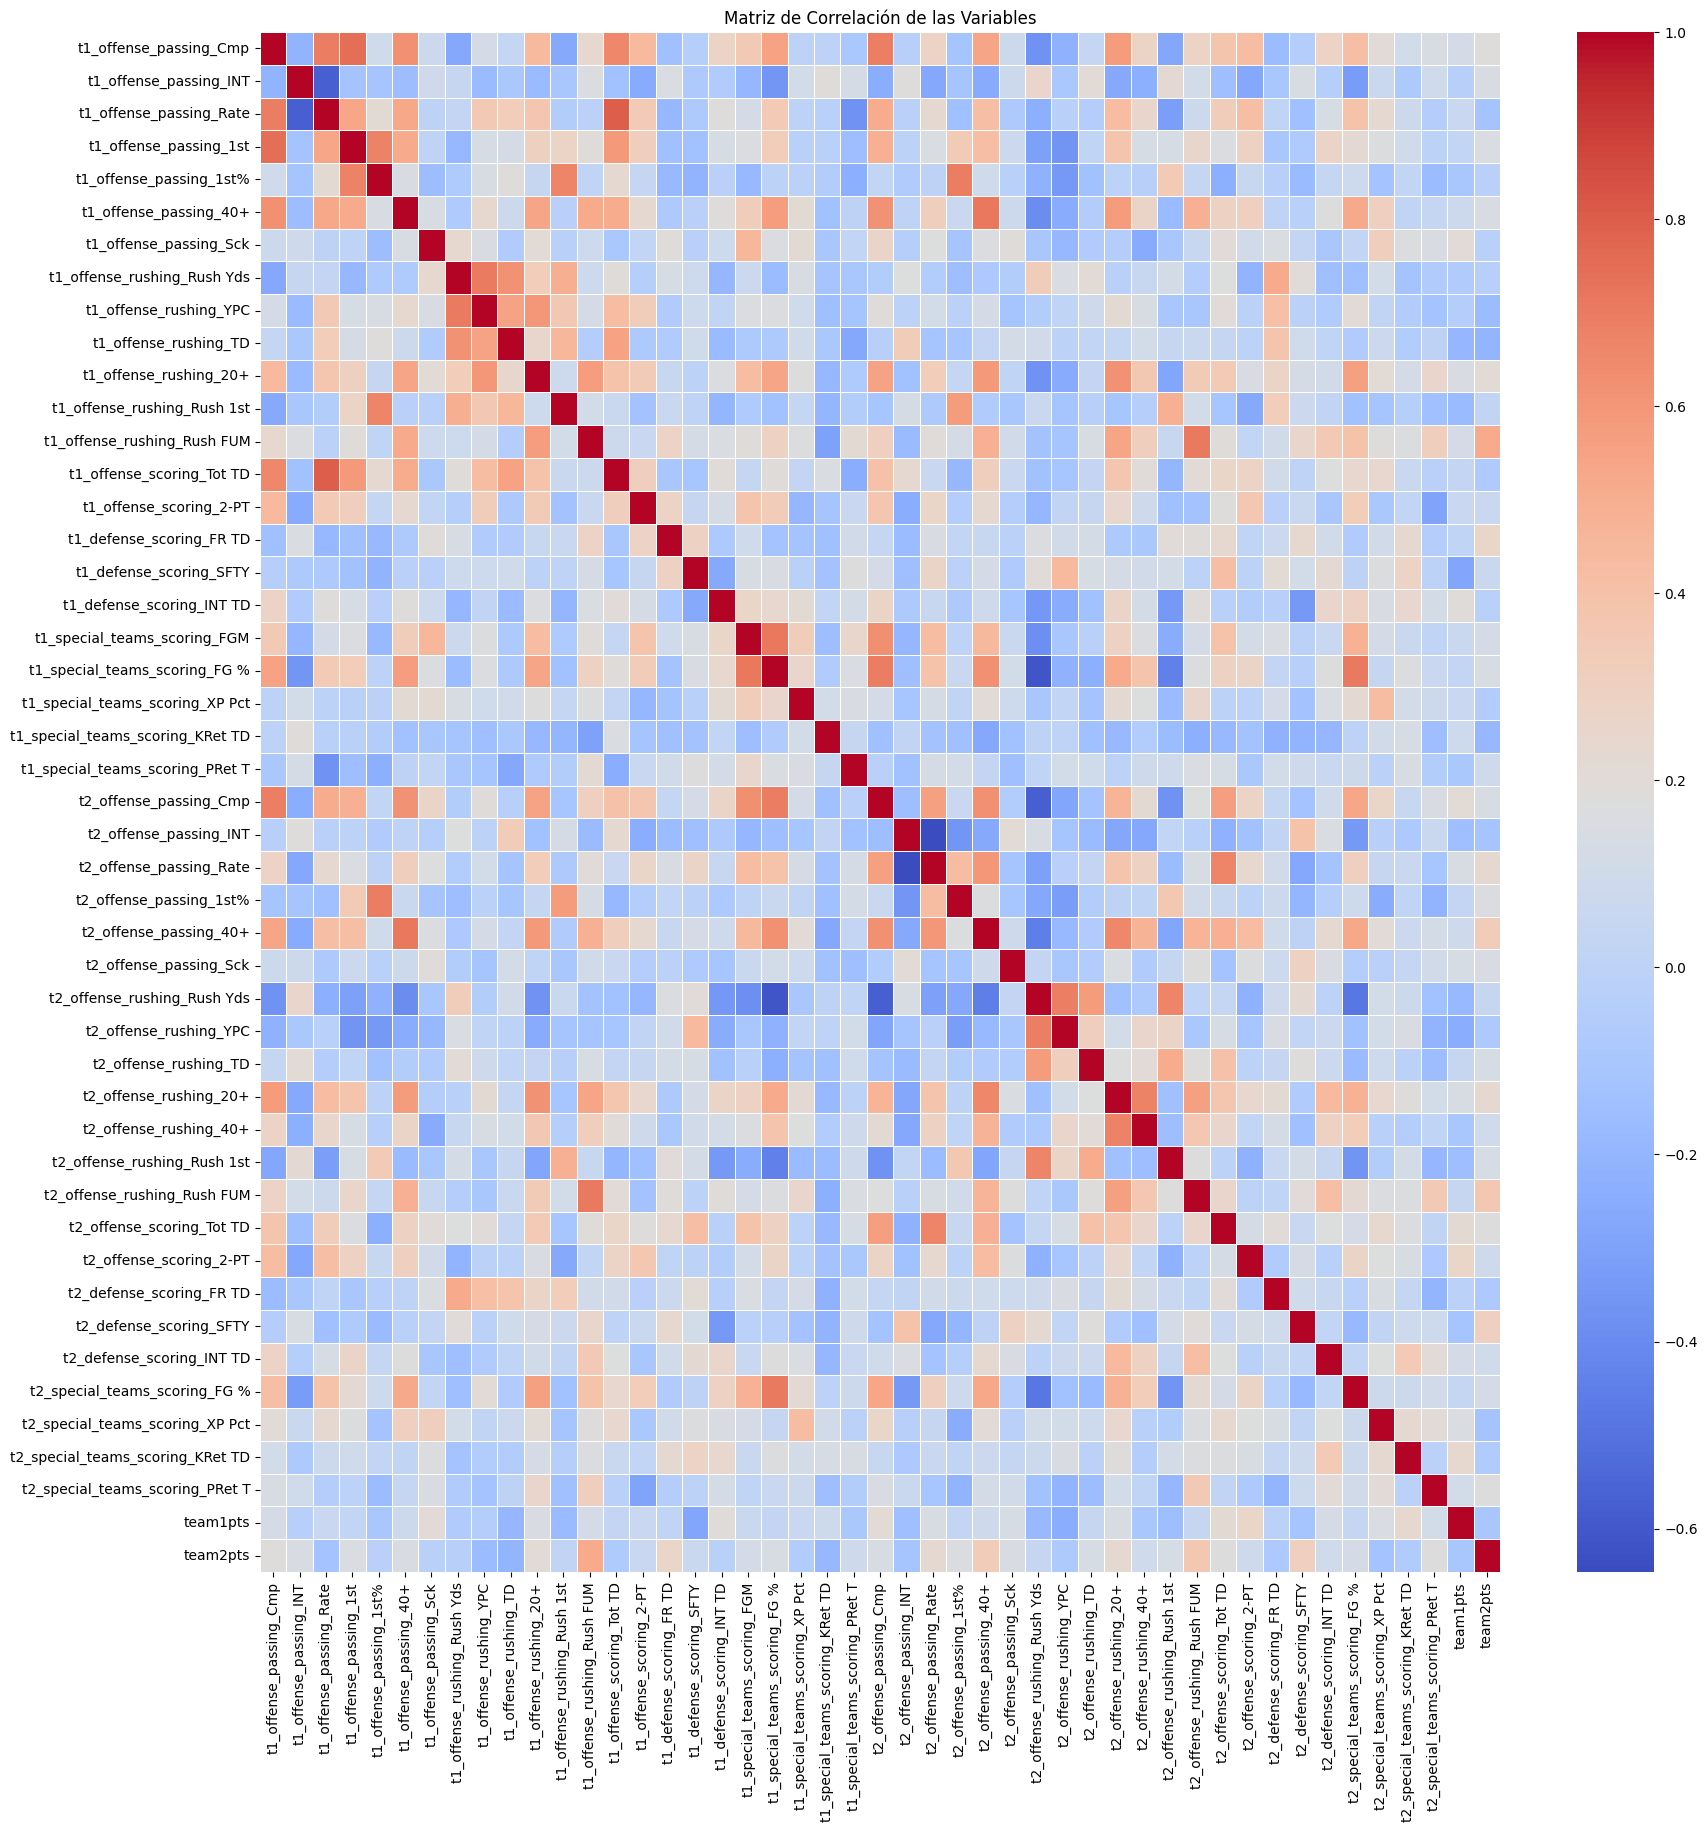

In [10]:
correlation_matrix = dfsb.corr()

# Visualizar la matriz de correlación usando un heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación de las Variables')
plt.show()

### Normalizando variables

In [11]:
# dfsb.to_csv("/content/drive/MyDrive/Super Bowl 2024/sb2024/dfsb_limpia.csv", index=False)

In [12]:
"""
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Seleccionar las columnas que serán normalizadas (todas las columnas excepto las de salida 'team1pts', 'team2pts')
features = dfsb.columns.drop(['team1pts', 'team2pts'])
df_scaled_features = scaler.fit_transform(dfsb[features])
df_scaled = pd.DataFrame(df_scaled_features, columns=features) # Dataset normalizado
df_scaled.index = dfsb.index # Asignando el mismo index a df_scaled que dfsb

# Agregando las variables objetivo sin normalizar
df_scaled['team1pts'] = dfsb['team1pts']
df_scaled['team2pts'] = dfsb['team2pts']
"""

"\nfrom sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\n\n# Seleccionar las columnas que serán normalizadas (todas las columnas excepto las de salida 'team1pts', 'team2pts')\nfeatures = dfsb.columns.drop(['team1pts', 'team2pts'])\ndf_scaled_features = scaler.fit_transform(dfsb[features])\ndf_scaled = pd.DataFrame(df_scaled_features, columns=features) # Dataset normalizado\ndf_scaled.index = dfsb.index # Asignando el mismo index a df_scaled que dfsb\n\n# Agregando las variables objetivo sin normalizar\ndf_scaled['team1pts'] = dfsb['team1pts']\ndf_scaled['team2pts'] = dfsb['team2pts']\n"

In [13]:
# Codigo alternativo con todo el dataset normalizado desde el inicio


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled_features = scaler.fit_transform(dfsb)
features = dfsb.columns.to_list()
df_scaled = pd.DataFrame(df_scaled_features, columns=features) # Dataset normalizado
# df_scaled.index = dfsb.index # Asignando el mismo index a df_scaled que dfsb


In [14]:
fig = px.box(df_scaled, y='team1pts')
fig.show()

In [15]:
fig = px.box(df_scaled, y='team2pts')
fig.show()

In [16]:
df_scaled.head()

,t1_offense_passing_Cmp,t1_offense_passing_INT,t1_offense_passing_Rate,t1_offense_passing_1st,t1_offense_passing_1st%,t1_offense_passing_40+,t1_offense_passing_Sck,t1_offense_rushing_Rush Yds,t1_offense_rushing_YPC,t1_offense_rushing_TD,...,t2_offense_scoring_2-PT,t2_defense_scoring_FR TD,t2_defense_scoring_SFTY,t2_defense_scoring_INT TD,t2_special_teams_scoring_FG %,t2_special_teams_scoring_XP Pct,t2_special_teams_scoring_KRet TD,t2_special_teams_scoring_PRet T,team1pts,team2pts
0,0.294118,0.833333,0.234767,0.154088,0.116484,0.0,0.500000,0.099747,0.000000,0.125000,...,0.0,0.00,0.000000,0.000000,0.453039,1.000000,0.5,0.000000,0.326531,0.236364
1,0.251634,0.500000,0.512545,0.141509,0.210989,0.0,0.477273,0.676136,0.571429,0.791667,...,0.0,0.00,0.000000,0.000000,0.513812,1.000000,0.5,0.000000,0.489796,0.054545
2,0.098039,0.541667,0.440860,0.022013,0.153846,0.0,0.000000,0.570707,0.428571,0.458333,...,0.0,0.25,0.000000,0.142857,0.419890,0.721519,0.0,0.000000,0.142857,0.254545
3,0.163399,0.291667,0.510753,0.000000,0.063736,0.0,0.477273,0.692551,0.476190,0.333333,...,0.0,0.25,0.333333,0.285714,0.469613,1.000000,0.0,0.000000,0.142857,0.436364
4,0.343137,0.458333,0.460573,0.116352,0.081319,0.0,0.181818,0.428030,0.285714,0.458333,...,0.0,0.25,0.333333,0.285714,0.495396,0.639241,0.0,0.333333,0.122449,0.290909


In [17]:
df_scaled_original = df_scaled.copy() # Checkpoint, datos para el 2024

In [18]:
df_scaled = df_scaled[:-1] # Eliminando datos de 2024 en df_scaled para evitar sesgos

In [19]:
df_scaled = df_scaled[~((df_scaled["team2pts"].isin([3, 52, 55])) | (df_scaled["team1pts"] == 3))] # Limpiando aun más el dataset df_scaled de posibles outliers

### Creando conjuntos de entrenamiento

In [20]:
from sklearn.model_selection import train_test_split

# Definir las características (X) y las variables objetivo (y)
X = df_scaled.drop(['team1pts', 'team2pts'], axis=1)
y = df_scaled[['team1pts', 'team2pts']]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Entrenamiento

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Configurar la red neuronal
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Capa de entrada y la primera capa oculta
    Dropout(0.1),  # Capa de Dropout después de la primera capa oculta
    Dense(32, activation='relu'),  # Capa oculta adicional
    Dropout(0.2),  # Capa de Dropout
    Dense(15, activation='relu'),  # Capa oculta adicional
    Dropout(0.1),  # Capa de Dropout antes de la capa de salida
    Dense(2, activation='linear')  # Capa de salida con 2 neuronas para las dos variables objetivo
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Resumen del modelo
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2944      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 15)                495       
                                                                 
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 3

In [22]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)

Epoch 1/50
4/4 [==============================] - 4s 242ms/step - loss: 0.3434 - val_loss: 0.2180
Epoch 2/50
4/4 [==============================] - 0s 38ms/step - loss: 0.2198 - val_loss: 0.1501
Epoch 3/50
4/4 [==============================] - 0s 18ms/step - loss: 0.1583 - val_loss: 0.1106
Epoch 4/50
4/4 [==============================] - 0s 39ms/step - loss: 0.1049 - val_loss: 0.0812
Epoch 5/50
4/4 [==============================] - 0s 45ms/step - loss: 0.0831 - val_loss: 0.0658
Epoch 6/50
4/4 [==============================] - 0s 22ms/step - loss: 0.0705 - val_loss: 0.0552
Epoch 7/50
4/4 [==============================] - 0s 64ms/step - loss: 0.0504 - val_loss: 0.0518
Epoch 8/50
4/4 [==============================] - 0s 41ms/step - loss: 0.0712 - val_loss: 0.0506
Epoch 9/50
4/4 [==============================] - 0s 20ms/step - loss: 0.0601 - val_loss: 0.0499
Epoch 10/50
4/4 [==============================] - 0s 14ms/step - loss: 0.0705 - val_loss: 0.0505
Epoch 11/50
4/4 [===========

In [23]:
# Evaluar el modelo en el conjunto de prueba
loss = model.evaluate(X_test, y_test, verbose=1)

1/1 [==============================] - 0s 23ms/step - loss: 0.0583


In [24]:
# Opcional: Realizar predicciones
predictions = model.predict(X_test)

1/1 [==============================] - 0s 99ms/step


In [25]:
predictions

array([[0.38402987, 0.4880419 ],
       [0.55955774, 0.513302  ],
       [0.439108  , 0.34510222],
       [0.28861535, 0.38924587],
       [0.47985417, 0.38452882],
       [0.44199753, 0.3371577 ],
       [0.29866552, 0.3821479 ],
       [0.48972154, 0.493168  ],
       [0.3181246 , 0.2971357 ],
       [0.5133408 , 0.51551235],
       [0.3870858 , 0.49015835]], dtype=float32)

In [26]:
y_test

,team1pts,team2pts
19,0.204082,1.000000
41,0.346939,0.381818
47,0.061224,0.236364
12,0.346939,0.490909
43,0.489796,0.509091
5,0.346939,0.381818
17,0.857143,0.181818
50,0.408163,0.418182
3,0.142857,0.436364
32,0.979592,0.381818


## Evaluando el modelo

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MSE: {mse}")
print(f"R^2: {r2}")


MSE: 0.05833308880586381
R^2: 0.04600113368816561


In [28]:
df_scaled_original[['team1pts', 'team2pts']].describe()

,team1pts,team2pts
count,53.000000,53.000000
mean,0.442819,0.444940
std,0.241724,0.197718
min,0.000000,0.000000
25%,0.285714,0.345455
50%,0.408163,0.436364
75%,0.632653,0.563636
max,1.000000,1.000000


## Cross Validation

In [29]:
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [30]:
X = np.array(X)
y = np.array(y)

def create_model(input_shape):
    model = Sequential([
        Dense(100, input_dim=input_shape, activation='relu'), # 129 NEURONAS NUMERO ÓPTIMO
        Dropout(0.2),
        #Dense(32, activation='relu'), # 32 NEURONAS NUMERO ÓPTIMO
        #Dropout(0.1),
        #Dense(80, activation='relu'), # 80 NEURONAS NUMERO ÓPTIMO
        #Dropout(0.1),
        Dense(2, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


kf = KFold(n_splits=5, shuffle=True, random_state=42) # Definiendo parámetros de KFold
mse_scores = []

for train_index, test_index in kf.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


    model = create_model(X_train.shape[1]) # Creando un nuevo modelo ( para no continuar el entrenamiento en el mismo modelo)
    model.fit(X_train, y_train, epochs=35, batch_size=10, verbose=0)  # 40 epocas son óptimas

    # Evaluación
    mse_score = model.evaluate(X_test, y_test, verbose=0)
    mse_scores.append(mse_score)

# Promedio de las métricas
average_mse = np.mean(mse_scores)

print(f"Average MSE: {average_mse}")


Average MSE: 0.06414104588329791


In [31]:
mse_scores

[0.10190543532371521,
 0.047062817960977554,
 0.07184477150440216,
 0.029478436335921288,
 0.07041376829147339]

In [32]:
df_scaled[["team1pts", "team2pts"]].describe()

,team1pts,team2pts
count,52.000000,52.000000
mean,0.451334,0.453497
std,0.235918,0.189479
min,0.061224,0.054545
25%,0.285714,0.345455
50%,0.408163,0.436364
75%,0.632653,0.563636
max,1.000000,1.000000


### Guardando el modelo

In [33]:
# model.save('/content/drive/MyDrive/Super Bowl 2024/sb2024/super_bowl.h5')  # Guarda el modelo a un archivo HDF5


## Predicciones

In [43]:
lista_columns_scaled = df_scaled.columns.to_list()
input_data = df_scaled_original[lista_columns_scaled][-1:].drop(columns=["team1pts", "team2pts"])
input_data = np.array(input_data)
predicciones = model.predict(input_data)

1/1 [==============================] - 0s 25ms/step


In [44]:
predicciones

array([[0.42424697, 0.38193387]], dtype=float32)

### Desnormalizando

In [45]:
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(dfsb[['team1pts', 'team2pts']]) # Ajustando el scaler a las variables objetivo
predicciones_desnormalizadas = scaler_y.inverse_transform(predicciones)

In [46]:
df.tail(1)[["Team1", "Team2"]]

,Team1,Team2
Year,,
2024,San Francisco 49ers,Kansas City Chiefs


In [47]:
predicciones_desnormalizadas

array([[20.788101, 21.006363]], dtype=float32)

## Más predicciones

In [48]:
ultimos5resultados = model.predict(np.array(df_scaled.tail().drop(columns=["team1pts", "team2pts"])))

1/1 [==============================] - 0s 21ms/step


In [49]:
# Asumiendo que dfsb es tu DataFrame original con los datos sin escalar
scaler_y = MinMaxScaler()
# Ajustar el scaler a las variables objetivo
y_scaled = scaler_y.fit_transform(dfsb[['team1pts', 'team2pts']])
# Suponiendo que 'predicciones_normalizadas' es un array con tus predicciones normalizadas
predicciones_desnormalizadas = scaler_y.inverse_transform(ultimos5resultados)


In [50]:
predicciones_desnormalizadas

array([[10.718231, 12.450765],
       [18.795706, 29.630213],
       [10.927573, 25.56304 ],
       [19.721767, 24.719423],
       [16.928745, 17.782385]], dtype=float32)

In [52]:
dfsb.tail(6)[:-1][["team1pts", "team2pts"]]

,team1pts,team2pts
Year,,
2019,3,13
2020,20,31
2021,9,31
2022,20,23
2023,38,35


### Otras pruebas

In [ ]:
# model.save('/content/drive/MyDrive/Super Bowl 2024/sb2024/super_bowl_vs.h5')  # Guarda el modelo a un archivo HDF5
